In [129]:
#Student ID 1002080520
import numpy as np
from numpy import loadtxt
import csv
import matplotlib.pyplot as plt

file = open('data1_training.csv')
csvreader = csv.reader(file, delimiter = ",")
data = []
for row in csvreader:
    data.append(row)

train_data = []
for i in range(0 , len(data)):
    col= []
    for j in range(0,len(data[i])):
        if j==len(data[i])-1:
            col.append(data[i][j])
        else:
            col.append(float(data[i][j]))
    train_data.append(col)
file.close()

file = open('data1_test.csv')
csvreader = csv.reader(file, delimiter = ",")
t_data = []
for row in csvreader:
    t_data.append(row)

test_data = []
for i in range(0 , len(t_data)):
    col= []
    for j in range(0,len(t_data[i])):
        if j==len(t_data[i])-1:
            col.append(t_data[i][j])
        else:
            col.append(float(t_data[i][j]))
    test_data.append(col)
file.close()


#We have successfully imported the data

In [130]:
#Importing the Input_Data in array X and corresponding Output_Data in array Y for both test and training
X = []
for i in range(len(train_data)):
    X.append(float(train_data[i][0]))
Y = []
for i in range(len(train_data)):
    Y.append(float(train_data[i][1]))

X_test = []
for i in range(len(test_data)):
    X_test.append(float(test_data[i][0]))
Y_test = []
for i in range(len(test_data)):
    Y_test.append(float(test_data[i][1]))
X = np.array(X)
Y=np.array(Y)

[2.4343916886674135, 3.325575328635021]
[2.43439168 3.32557532]


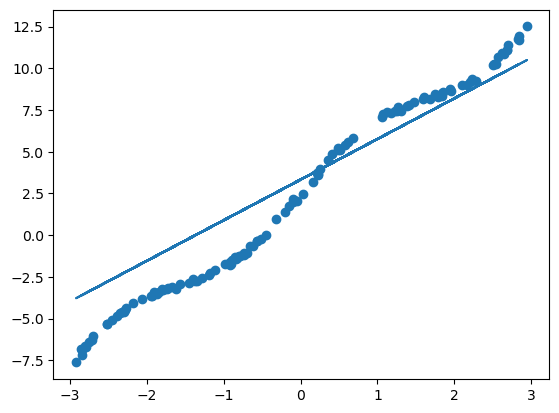

In [131]:
#Intializing a weight matrix first
def weight_matrix(X,Y):
    w=[]
    v= np.add(X,np.multiply(np.mean(X),-1))
    c= np.add(Y,np.multiply(np.mean(Y),-1))
    v_2 = np.multiply(v,v)
    n=np.multiply(v,c)
    b_1 = np.sum(n)/np.sum(v_2)
    b_0 = np.mean(Y)-(b_1*np.mean(X))
    w.append(b_0)
    w.append(b_1)
    return w

def fit_weight_matrix(X,Y,w):
    np.reshape(w,(2,1))
    for i in range(0,5):
        H=np.ones(len(X))
        H=np.vstack((H,X))
        z=np.dot(np.transpose(w),H)
        z=np.add(z,np.multiply(Y,-1))
        z=np.multiply(z,X)
        z=np.multiply(z,0.1)
        z=np.sum(z)
        w = np.add(w,np.multiply(z,(-1)))
    return w
w = weight_matrix(X,Y)
print(w)
w = fit_weight_matrix(X,Y,w)
print(w)

def predict_1(X):
    return X*2.4343916886674135+3.325575328635021

plt.scatter(X,Y)
plt.plot(X, predict_1(X))

In [132]:
# We will associate the locally weighted matrix for given test_data
#Parameter tau
T=0.18
print(w)
def locally_weighted(X_test,X,Y,w,T):
    f=np.add(np.multiply(X,w[1]),w[0])
    f=np.square(np.add(f,np.multiply(Y,-1)))
    v = np.square(np.add(X,(-X_test)))
    d=1/(2*T*T)
    v=np.multiply(v,(-d))
    v =np.exp(v)
    v =np.multiply(v,f)
    v=np.sum(v)
    v=v
    return v
#Now we will set a locally weighted matrix for given test

[2.43439168 3.32557532]


In [133]:
#Now we will set a locally weighted matrix for given test_data
def assigning_locallyweighted_matrix(X_test,X,Y,w,T):
    locally_weight_matrix = []
    for i in range(0,len(X_test)):
        locally_weight_matrix.append(locally_weighted(X_test[i],X,Y,w,T))
    return locally_weight_matrix

locally_weight_matrix = assigning_locallyweighted_matrix(X_test,X,Y,w,T)
print(locally_weight_matrix)

[1.2876678819976484, 2.4814959588578334, 2.4698089645027133, 4.533391300799741, 3.2138713462736406, 1.9845329190635592, 1.823799683769109, 11.46925826444112, 7.72606268272128, 2.0577929320931565]


In [134]:
#Prediction for the given test_data by training all the given data points
def predict(lw,X_test):
    return np.multiply(lw,X_test)
Y_predict = predict(locally_weight_matrix,X_test)
print(Y_predict)
print(Y_test)



[ -0.23435555  -3.54605773  -6.33999961   3.83298234  -1.03325964
   4.58129424   3.98135471 -11.38323883   8.69568355  -5.38215741]
[1.5069850076032, -2.7813065969257, -5.5720691543998, 6.4520342330929, 0.77515096235086, 9.5842960801335, 9.1998952035858, -1.8891871012514, 7.2166946343333, -5.7857415009064]


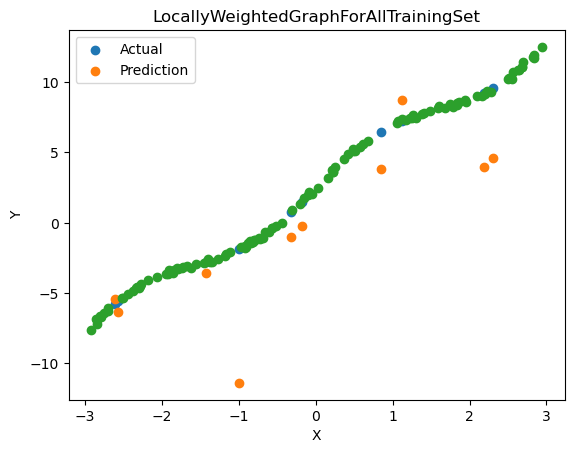

In [141]:
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict , label="Prediction")
plt.title("LocallyWeightedGraphForAllTrainingSet")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y)


2.164381197027481 3.2362228623439746
[-8.12851220e-03 -7.62482977e-01 -6.09420960e-01  1.36671387e-06
 -1.58233747e-02  2.11896427e-01  2.91082186e-01 -1.54116534e+00
  1.31659095e-03 -5.06919264e-01]
[1.5069850076032, -2.7813065969257, -5.5720691543998, 6.4520342330929, 0.77515096235086, 9.5842960801335, 9.1998952035858, -1.8891871012514, 7.2166946343333, -5.7857415009064]


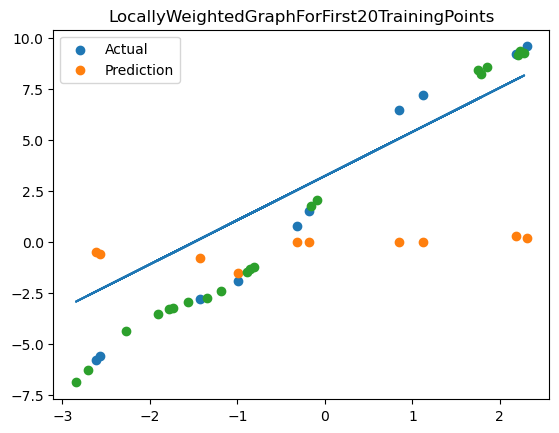

In [142]:
#Repeating the locally weighted Training For only First 20 TrainingPoints
X_20 = X[0:20]
Y_20 = Y[0:20]
w = weight_matrix(X_20,Y_20)
w = fit_weight_matrix(X_20,Y_20,w)
print(w[0],w[1])
def predict(X):
    return X*2.164381197027481 +3.2362228623439746
plt.plot(X_20,predict(X_20))
locally_weight_matrix = assigning_locallyweighted_matrix(X_test,X_20,Y_20,w,T)
def predict(lw,X_test):
    return np.multiply(lw,X_test)
Y_predict_20 = predict(locally_weight_matrix,X_test)
print(Y_predict_20)
print(Y_test)
plt.scatter(X_test,Y_test, label = "Actual")
plt.scatter(X_test,Y_predict_20 , label="Prediction")
plt.title("LocallyWeightedGraphForFirst20TrainingPoints")
plt.legend()
plt.scatter(X_20,Y_20)

In [137]:
#Mean Squared Error For Evaluation of Locally Weighted Linear Regression
def MSE(X,Y):
    mse = np.add(X,np.multiply(Y,-1))
    mse = np.multiply(mse,mse)
    mse = np.sum(mse)
    mse = mse/len(X)
    return mse

In [138]:
MSE_data = MSE(Y_predict,Y_test)
MSE_20 = MSE(Y_predict_20,Y_test)
print("MSE for all training set is %f"%MSE_data)
print("MSE for first 20 data points training set is %f"%MSE_20)

MSE for all training set is 15.908711
MSE for first 20 data points training set is 32.051105


# CONCLUSION

Thus we can conclude all the following questions from above expirement

Q2.c) Compare to the LinearRegression done normally the locally weighted matrix has way more errors then the first question given in project.

Q2.d) Comparing both the Mean_Squared_Error of the training with all data points and training with first 20 data points the Mean Square Error in first 20 data points is more as in locally weighted Linear Regression we allocate the weights to the given input , with respect to the near available points in the given training set, now as we are having only 20 data points there are many chances of error in prediction as there may be many near data points which we are not considering when it comes to train and assign a local weight by just taking first 20 points of data into consideration , hence there is more error in training with first 20 data points , rather than in training with all data points , and also the first question has way too negligible error maybe due to reason for precise minimization.

Q2.e)Yes comparing the outcome of question1 and question2 we can clearly see that there is minimal error in prediction of first question of the project whereas in the second question there are many high margins in error, hence one can say from the given graph that there are high chances that the given data is already taken from a particular function